## **Importing libraries and loading the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option("display.max_columns",None)
data = pd.read_csv("HospInfo.csv")
data

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,True,True,3,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,True,4,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,True,True,Not Available,There are too few measures or measure groups r...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,True,True,3,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,CLEAR LAKE REGIONAL MEDICAL CENTER,500 MEDICAL CENTER BLVD,WEBSTER,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,True,True,3,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410..."
4808,520194,ORTHOPAEDIC HOSPITAL OF WISCONSIN,475 W RIVER WOODS PKWY,GLENDALE,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,False,NaN,Not Available,There are too 

## **Data understanding and Data cleaning**

In [ ]:
data.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [ ]:
data.shape

(4812, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Provider ID,0
Hospital Name,0
Address,0
City,0
State,0
ZIP Code,0
County Name,15
Phone Number,0
Hospital Type,0
Hospital Ownership,0


In [ ]:
data.dropna(subset=["County Name"],inplace = True)
data.drop(columns = ["Meets criteria for meaningful use of EHRs"],inplace = True)
footnote = [col for col in data.columns if 'footnote' in col]
data = data.drop(columns = footnote)

- There are 15 missing values in the "County Name" column. Since removing these rows does not significantly impact the overall analysis, they are dropped.

- The column "Meets criteria for meaningful use of EHRs" does not offer meaningful insights and is therefore removed.

- Additionally, the footnote columns contain over 70% missing values and do not contribute meaningfully to the analysis. Therefore, these columns are also removed from the dataset.



# **EDA**

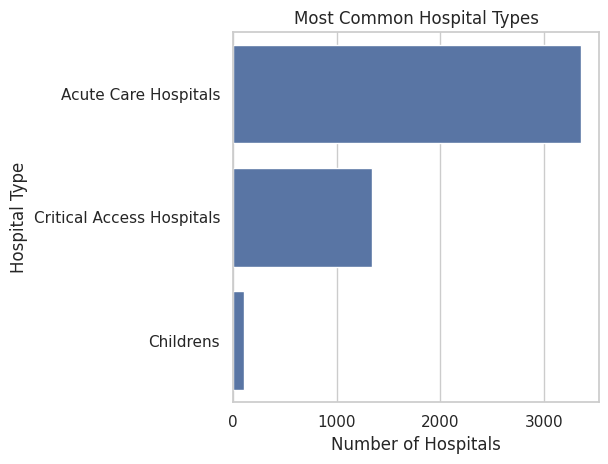

In [ ]:
# 1. Most Common Hospital Types

plt.figure()
sns.countplot(data=data, y='Hospital Type', order=data['Hospital Type'].value_counts().index)
plt.title("Most Common Hospital Types")
plt.xlabel("Number of Hospitals")
plt.tight_layout()
plt.show()



Insights: The most prevalent hospital type is "Acute Care Hospitals," significantly outnumbering other types like "Critical Access Hospitals" and "Psychiatric Hospitals." This indicates that the dataset is heavily skewed towards general medical and surgical facilities.

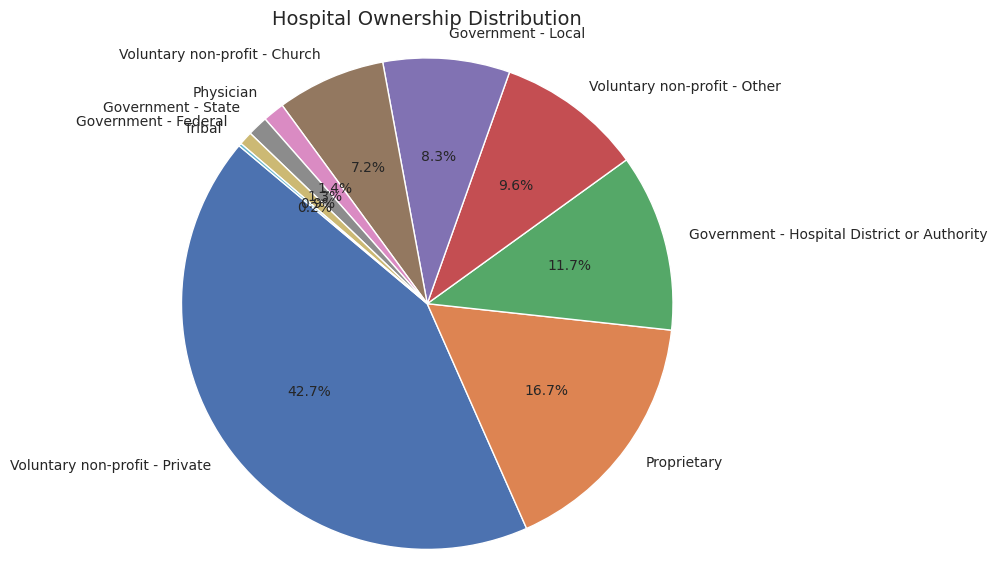

In [ ]:
# 2. Hospital Ownership Distribution

ownership_counts = data['Hospital Ownership'].value_counts()

# Plot with better formatting
plt.figure(figsize=(10, 6))
plt.pie(ownership_counts,
        labels=ownership_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 10},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title("Hospital Ownership Distribution", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

Insights: Hospital Ownership Distribution: A large proportion of hospitals are classified as "Voluntary non-profit - Private," followed by "Proprietary" and "Government - Federal." "Physician," "Tribal," and "Government - State" ownership types are less common.

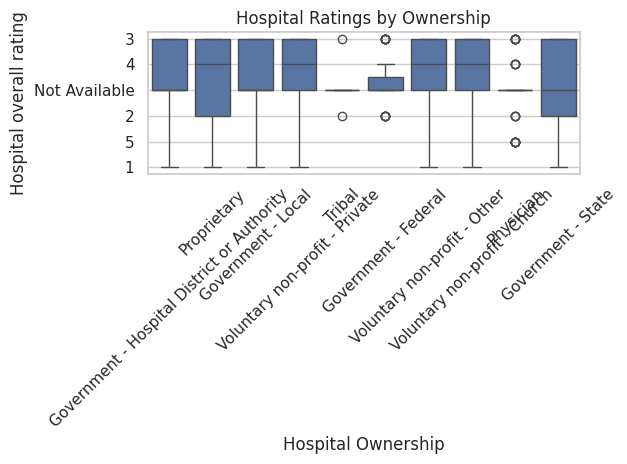

In [ ]:
# 3. Hospital Ratings by Ownership

plt.figure()
sns.boxplot(data=data, x='Hospital Ownership', y='Hospital overall rating')
plt.title("Hospital Ratings by Ownership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights: Hospital Ratings by Ownership: The box plot shows that while there are variations, most ownership types have a median overall hospital rating around 3. "Physician" owned hospitals show a slightly higher median, and "Government - State" hospitals have a wider spread of ratings. It's important to note the "Not Available" ratings skew the interpretation.

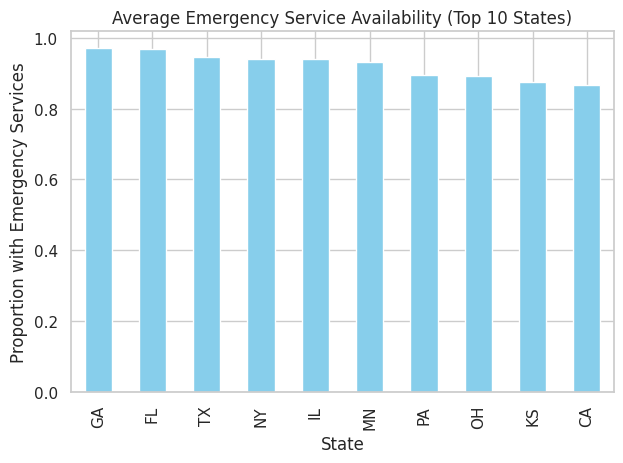

In [ ]:
# 4. Emergency Services Availability by State (Top 10 States)

top_states = data['State'].value_counts().nlargest(10).index
es_by_state = data[data['State'].isin(top_states)].groupby('State')['Emergency Services'].mean().sort_values(ascending=False)

plt.figure()
es_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Emergency Service Availability (Top 10 States)")
plt.ylabel("Proportion with Emergency Services")
plt.xlabel("State")
plt.tight_layout()
plt.show()

Insights: Emergency Services Availability by State (Top 10 States): Among the top 10 states with the most hospitals in the dataset, most have a high proportion of hospitals offering emergency services, with some states showing nearly all hospitals providing this service.

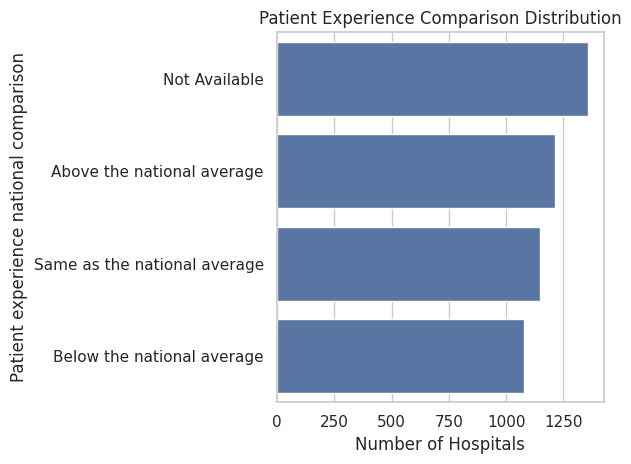

In [ ]:
# 5. Patient Experience Comparison Distribution

plt.figure()
sns.countplot(data=data, y='Patient experience national comparison', order=data['Patient experience national comparison'].value_counts().index)
plt.title("Patient Experience Comparison Distribution")
plt.xlabel("Number of Hospitals")
plt.tight_layout()
plt.show()

Insights: Patient Experience Comparison Distribution: The distribution shows that a significant number of hospitals are rated as "Same as the national average" for patient experience, with fewer hospitals rated "Above the national average" or "Below the national average." A substantial number are also "Not Available."

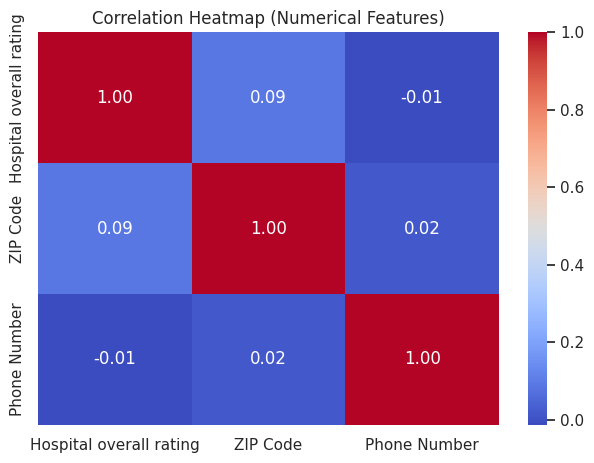

In [ ]:
# 6. Heatmap: Correlation Among Numerical Features

# Convert rating to numeric for correlation
data['Hospital overall rating'] = pd.to_numeric(data['Hospital overall rating'], errors='coerce')
corr_matrix = data[['Hospital overall rating', 'ZIP Code', 'Phone Number']].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

Insights:  The heatmap reveals very weak correlations between 'Hospital overall rating', 'ZIP Code', and 'Phone Number'. This suggests that these numerical features, as they are represented in the dataset, do not have a significant linear relationship with each other. The 'Hospital overall rating' was converted to numeric, and the presence of 'Not Available' values likely impacts this correlation.

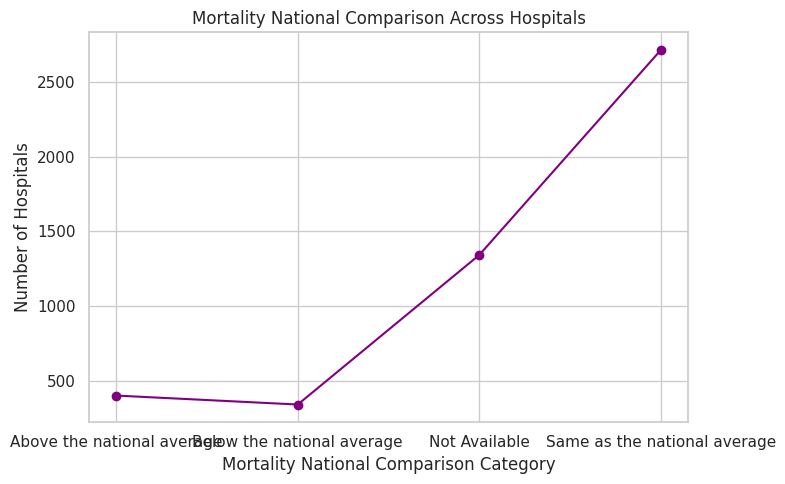

In [ ]:
mortality_counts = data['Mortality national comparison'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
plt.plot(mortality_counts.index, mortality_counts.values, marker='o', linestyle='-', color='purple')
plt.title("Mortality National Comparison Across Hospitals")
plt.xlabel("Mortality National Comparison Category")
plt.ylabel("Number of Hospitals")
plt.tight_layout()
plt.show()

Insights: A substantial number of hospitals have mortality rates that are "Same as the national average." There are also a considerable number rated as "Below the national average" and "Above the national average." A significant portion also have "Not Available" data for this comparison.

In [ ]:
df_cleaned = pd.read_csv("/content/cleaned_hospital_data - cleaned_hospital_data.csv")
df_cleaned.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,4,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Same as the national average,Not Available,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,True,Not Available,Not Available,Not Available,Not Available,Not Available,Below the national average,Same as the national average,Not Available,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [ ]:
df_cleaned_float = df_cleaned[df_cleaned['Hospital overall rating'] != 'Not Available']

df_cleaned_float['Hospital overall rating'] = df_cleaned_float['Hospital overall rating'].astype(float)

/tmp/ipython-input-7-2496503443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_float['Hospital overall rating'] = df_cleaned_float['Hospital overall rating'].astype(float)


In [ ]:
#Chi-Square Test Result:
df_chi = df_cleaned_float[['Hospital Type', 'Patient experience national comparison']].dropna()

# Create a contingency table
contingency_table = pd.crosstab(df_chi['Hospital Type'], df_chi['Patient experience national comparison'])

# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the test results
{
    "Chi-Square Statistic": chi2_stat,
    "Degrees of Freedom": dof,
    "P-Value": p_val,
    "Conclusion": "Significant association" if p_val < 0.05 else "No significant association"
}

{'Chi-Square Statistic': np.float64(722.8825739202099),
 'Degrees of Freedom': 3,
 'P-Value': np.float64(2.2914850085230928e-156),
 'Conclusion': 'Significant association'}

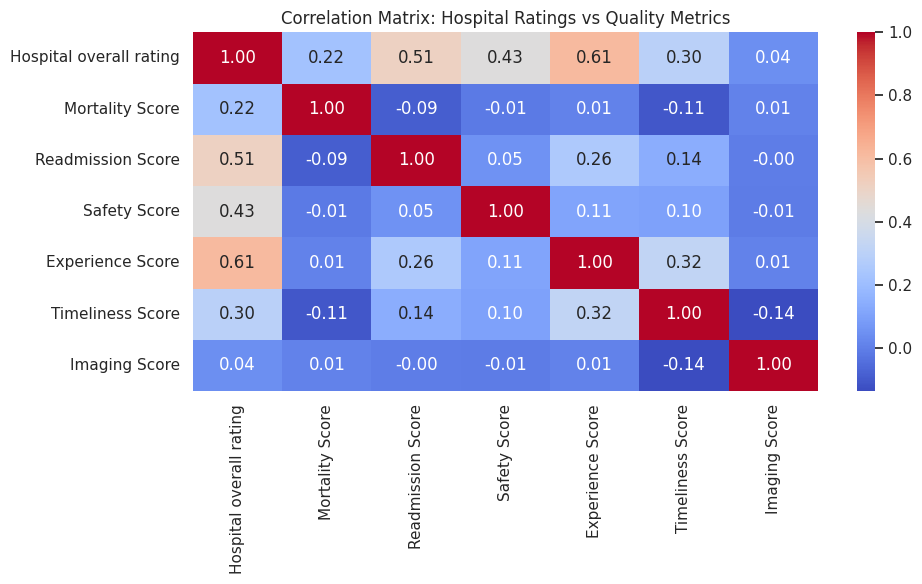

In [ ]:
# Correlation Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_cleaned_float

# Map quality labels to numeric scores
rating_map = {
    'Above the national average': 3,
    'Same as the national average': 2,
    'Below the national average': 1,
    'Not Available': None,
    'Not available': None
}

df['Mortality Score'] = df['Mortality national comparison'].map(rating_map)
df['Readmission Score'] = df['Readmission national comparison'].map(rating_map)
df['Safety Score'] = df['Safety of care national comparison'].map(rating_map)
df['Experience Score'] = df['Patient experience national comparison'].map(rating_map)
df['Timeliness Score'] = df['Timeliness of care national comparison'].map(rating_map)
df['Imaging Score'] = df['Efficient use of medical imaging national comparison'].map(rating_map)
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors='coerce')

# Create correlation heatmap
numeric_cols = df[[
    'Hospital overall rating',
    'Mortality Score',
    'Readmission Score',
    'Safety Score',
    'Experience Score',
    'Timeliness Score',
    'Imaging Score'
]].dropna(how='all')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Hospital Ratings vs Quality Metrics")
plt.tight_layout()
plt.show()

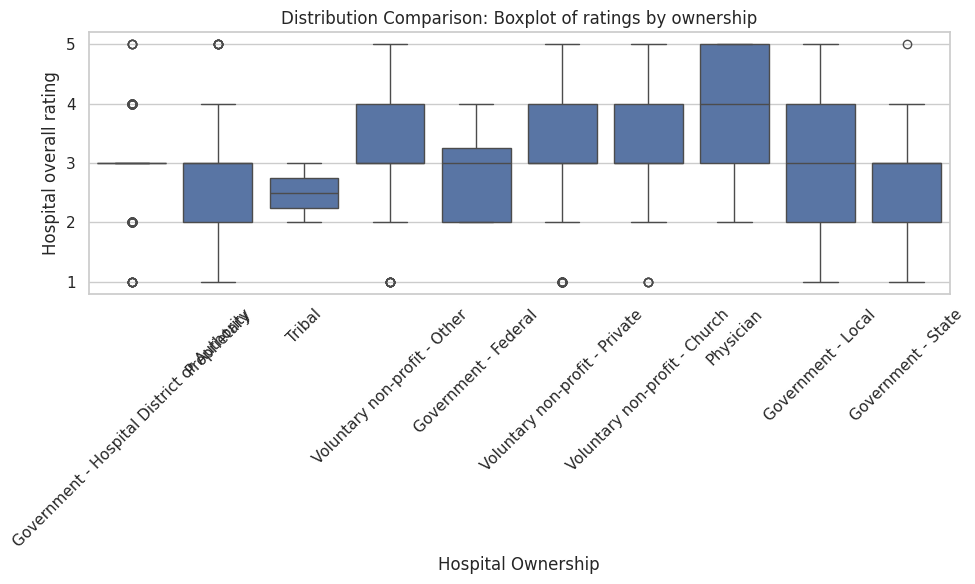

In [ ]:
# Distribution Comparison: Boxplot of ratings by ownership

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_float, x='Hospital Ownership', y='Hospital overall rating')
plt.title("Distribution Comparison: Boxplot of ratings by ownership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Basic dashboard on this dataset using plotly

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = df_cleaned_float.copy()

# 1. Hospital Type Count
fig1 = px.bar(data['Hospital Type'].value_counts().reset_index(),
             x='count', y='Hospital Type', orientation='h',
             title='Most Common Hospital Types')

# 2. Hospital Ownership Distribution (Pie Chart)
ownership_counts = data['Hospital Ownership'].value_counts()
fig2 = go.Figure(data=[go.Pie(labels=ownership_counts.index, values=ownership_counts.values)])
fig2.update_layout(title_text='Hospital Ownership Distribution')

# 3. Hospital Ratings by Ownership (Box Plot)
# Ensure 'Hospital overall rating' is numeric, coercing errors to NaN
data['Hospital overall rating'] = pd.to_numeric(data['Hospital overall rating'], errors='coerce')
fig3 = px.box(data, x='Hospital Ownership', y='Hospital overall rating',
             title='Hospital Ratings by Ownership')
fig3.update_layout(xaxis_tickangle=-45)

# 4. Emergency Services Availability by State (Top 10 States)
top_states = data['State'].value_counts().nlargest(10).index
es_by_state = data[data['State'].isin(top_states)].groupby('State')['Emergency Services'].mean().sort_values(ascending=False).reset_index()
fig4 = px.bar(es_by_state, x='State', y='Emergency Services',
             title='Average Emergency Service Availability (Top 10 States)')

# 5. Patient Experience Comparison Distribution
fig5 = px.bar(data['Patient experience national comparison'].value_counts().reset_index(),
             x='count', y='Patient experience national comparison', orientation='h',
             title='Patient Experience Comparison Distribution')


# Display plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

# Create a dashboard using subplots (optional, combining some charts)
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Hospital Types", "Ownership Distribution", "Ratings by Ownership", "Emergency Services by State"),
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"type": "box"}, {"type": "bar"}]])

# Add plots to the subplots
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Hospital Data Dashboard")
fig.show()

**Conclusion:**

Hospital Profile: The dataset is dominated by Acute Care Hospitals, with many being non-profit or proprietary in ownership.

Ratings Distribution: Most hospitals are rated around the national average (3), but missing data limits clear comparisons across ownership types.

Emergency Services: Widely available, especially in states with a high number of hospitals.

Quality Metrics: Metrics like mortality, readmission, and safety show weak correlations, indicating they reflect different dimensions of care.

Limitations: Missing data—especially in quality comparisons and ratings—reduces the strength of statistical insights and limits reliable conclusions.